# CrowdTruth for Binary Choice Tasks: Relation Extraction

In this tutorial, we will apply CrowdTruth metrics to a **binary choice** crowdsourcing task for **Relation Extraction** from sentences. The workers were asked to read a sentence with 2 highlighted terms, then decide whether the *top employee/member* relation is expressed between the 2 terms in the sentence. The task was executed on [FigureEight](https://www.figure-eight.com/).

This is a screenshot of the task as it appeared to workers:

![Task Template](img/relex-binary.png)

A sample dataset for this task is available in [this file](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/data/relex-binary-choice.csv), containing raw output from the crowd on FigureEight. Download the file and place it in a folder named `data` that has the same root as this notebook. Now you can check your data:

In [1]:
import pandas as pd

test_data = pd.read_csv("data/relex-binary-choice.csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,_ip,term1,b1,e1,b2,term2,e2,sent_id,sentence,top_member_employee
0,897534786,3/24/2016 17:57:02,1933498788,3/24/2016 17:56:23,False,prodege,0.9724,3587109,NaN,NaN,...,NaN,Karim Benzema,6,8,3,Lyon,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",True
1,897534786,3/24/2016 18:05:23,1933504209,3/24/2016 18:05:01,False,clixsense,0.9667,21665495,NaN,NaN,...,NaN,Karim Benzema,6,8,3,Lyon,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",False
2,897534786,3/24/2016 18:07:31,1933505542,3/24/2016 18:04:46,False,neodev,0.9443,33110177,NaN,NaN,...,NaN,Karim Benzema,6,8,3,Lyon,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",False
3,897534786,3/24/2016 19:02:00,1933542791,3/24/2016 18:58:54,False,neodev,0.9417,16854635,NaN,NaN,...,NaN,Karim Benzema,6,8,3,Lyon,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",False
4,897534786,3/24/2016 19:31:55,1933572756,3/24/2016 19:30:21,False,clixsense,0.9543,6344072,NaN,NaN,...,NaN,Karim Benzema,6,8,3,Lyon,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",False


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [3]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of relations
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [4]:
class TestConfig(DefaultConfig):
    inputColumns = ["sent_id", "term1", "b1", "e1", "term2", "b2", "e2", "sentence"]
    outputColumns = ["top_member_employee"]
    
    # processing of a closed task
    open_ended_task = False
    annotation_vector = ["true", "false"]
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [5]:
data, config = crowdtruth.load(
    file = "data/relex-binary-choice.csv",
    config = TestConfig()
)

data['judgments'].head()

,output.top_member_employee,output.top_member_employee.count,output.top_member_employee.unique,submitted,started,worker,unit,duration,job
judgment,,,,,,,,,
1933498788,"{u'true': 1, u'false': 0}",1,2,2016-03-24 17:57:02,2016-03-24 17:56:23,3587109,897534786,39,data/relex-binary-choice
1933504209,"{u'false': 1, u'true': 0}",1,2,2016-03-24 18:05:23,2016-03-24 18:05:01,21665495,897534786,22,data/relex-binary-choice
1933505542,"{u'false': 1, u'true': 0}",1,2,2016-03-24 18:07:31,2016-03-24 18:04:46,33110177,897534786,165,data/relex-binary-choice
1933542791,"{u'false': 1, u'true': 0}",1,2,2016-03-24 19:02:00,2016-03-24 18:58:54,16854635,897534786,186,data/relex-binary-choice
1933572756,"{u'false': 1, u'true': 0}",1,2,2016-03-24 19:31:55,2016-03-24 19:30:21,6344072,897534786,94,data/relex-binary-choice


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [6]:
results = crowdtruth.run(data, config)

`results` is a dict object that contains the quality metrics for sentences, relations and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [7]:
results["units"].head()

,duration,input.b1,input.b2,input.e1,input.e2,input.sent_id,input.sentence,input.term1,input.term2,job,output.top_member_employee,output.top_member_employee.annotations,output.top_member_employee.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,,,,
897534786,140.800000,6,3,8,4,UAD-A-1535,"On Wednesday , Lyon led through Karim Benzema ...",Karim Benzema,Lyon,data/relex-binary-choice,"{u'true': 2, u'false': 13}",15,2,15,0.838396,"{u'false': 0.917969296195, u'true': 0.08203070...",0.752381,"{u'false': 0.866666666667, u'true': 0.13333333..."
897534787,48.533333,23,30,25,32,UAD-A-2322,"`` We have all this library content , and we '...",Jeff Zucker,NBC Universal,data/relex-binary-choice,"{u'false': 0, u'true': 15}",15,1,15,1.000000,"{u'true': 1.0, u'false': 0.0}",1.000000,"{u'true': 1.0, u'false': 0.0}"
897534788,190.933333,0,14,2,17,UAD-A-0024,"Addie Wagenknecht ( born Portland , Oregon ) i...",Addie Wagenknecht,New York City,data/relex-binary-choice,"{u'true': 0, u'false': 15}",15,1,15,1.000000,"{u'false': 1.0, u'true': 0.0}",1.000000,"{u'false': 1.0, u'true': 0.0}"
897534789,51.800000,2,0,4,1,UAD-A-2211,Toyota President Katsuaki Watanabe said Thursd...,Katsuaki Watanabe,Toyota,data/relex-binary-choice,"{u'false': 2, u'true': 13}",15,2,15,0.957069,"{u'true': 0.979734541799, u'false': 0.02026545...",0.752381,"{u'true': 0.866666666667, u'false': 0.13333333..."
897534790,128.600000,0,23,2,26,UAD-A-0115,"Andrea Bargnani , nicknamed `` Il Mago '' ( tr...",Andrea Bargnani,"Rome , Italy",data/relex-binary-choice,"{u'true': 0, u'false': 15}",15,1,15,1.000000,"{u'false': 1.0, u'true': 0.0}",1.000000,"{u'false': 1.0, u'true': 0.0}"


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

Text(0,0.5,'Sentences')

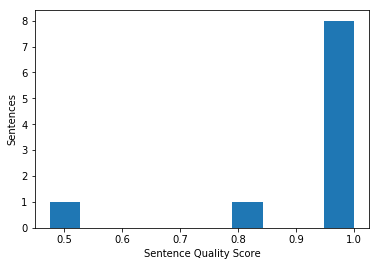

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")

The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [9]:
results["units"]["unit_annotation_score"].head()

unit
897534786    {u'false': 0.917969296195, u'true': 0.08203070...
897534787                        {u'true': 1.0, u'false': 0.0}
897534788                        {u'false': 1.0, u'true': 0.0}
897534789    {u'true': 0.979734541799, u'false': 0.02026545...
897534790                        {u'false': 1.0, u'true': 0.0}
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [10]:
results["workers"].head()

,duration,job,judgment,unit,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
3587109,25.333333,1,3,3,0.514863,0.716289,0.718792,0.477970,0.690476,0.692232
4316379,30.000000,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4688131,136.000000,1,1,1,1.000000,1.000000,1.000000,0.925836,0.928571,0.997054
4711962,35.000000,1,1,1,0.000530,0.022533,0.023523,0.005478,0.071429,0.076696
6336109,122.000000,1,1,1,1.000000,1.000000,1.000000,0.925836,0.928571,0.997054


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0,0.5,'Workers')

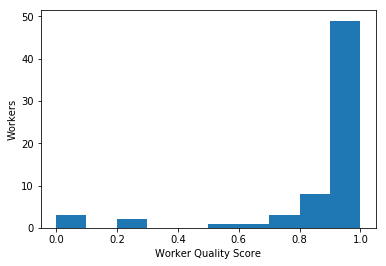

In [11]:
plt.hist(results["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

The **annotation metrics** are stored in `results["annotations"]`. The `aqs` column contains the **annotation quality scores**, capturing the overall worker agreement over one relation.

In [12]:
results["annotations"]

,output.top_member_employee,aqs,aqs_initial
false,150,0.960091,0.867665
true,150,0.921697,0.795133
